In [1]:
#Import packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Imports raw data
housing_import = pd.read_csv('trimmed_data.csv', index_col='Id')

In [3]:
# Cleaning out NaN values remaining
housing_import = housing_import[housing_import.MasVnrType.isnull() == False]
housing = housing_import.drop('MiscFeature', axis=1)

In [4]:
pd.get_dummies(housing)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,856,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,1262,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,920,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,961,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,1145,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,953,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,2073,0,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,1188,0,...,0,0,0,1,0,0,0,0,1,0


My interpretation of the get dummies function is that it took each categorical variable and added a variable to the dataframe for each category and populated that variable with a binary to capture datapoints from that category. 

In [5]:
housing_dummies = pd.get_dummies(housing)

In [6]:
# Creating Target and Feature Arrays
# .values returns numpy array instead of dataframe
X = housing_dummies.drop('SalePrice', axis=1).values
y = housing_dummies.SalePrice.values

In [7]:
# Unsure as what I need as far as reshaping goes
X.shape
y.shape

y = y.reshape(-1, 1)

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [9]:
X_train.shape

(1089, 273)

In [10]:
# Creating a dataframe for performance metrics
d = {'R_Squared': [], 'RMSE': [], 'MAPE (%)': [], 'Worst Underestimate':[], 'Worst Overestimate':[]}
metrics = pd.DataFrame(data=d)
metrics.index.name = 'Model'
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,


In [11]:
# Create LinearRegression Object
reg = LinearRegression()

In [12]:
# Fit the data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Create Predictions based on fit
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
y_pred_all = reg.predict(X)

In [14]:
# Performance Metrics for training set
print("R^2: {}".format(reg.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-y_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.930668487832045
Root Mean Squared Error: 20867.61910938707
Mean Absolute Percent Error: 8.179160424146515


In [15]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [reg.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape], 
     'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Linear_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [16]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.17916,N/A,N/A


In [17]:
# Performance Metrics for test set
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-y_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8770252691748901
Root Mean Squared Error: 27774.277800625732
Mean Absolute Percent Error: 11.10724000427329


In [18]:
# Finding worst residuals for 95% 
residuals = y_test - y_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [19]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 55049.22390020732
p + 54799.052583360346


In [20]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [reg.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],  
     'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Linear_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [21]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.17916,N/A,N/A
Linear_Test,0.877025,27774.277801,11.10724,54799.1,55049.2


# Overfitting

The performance metrics suggest some overfitting. Differences in R squared and MAPE between the training and test sets suggest some overfitting. Errors in the test set also increased by roughly 33%. 

Models to be explored for less overfitting include ridge and lasso. Once baselines have been tested, hyperparamaters will be tuned. 


In [22]:
# Applying Ridge Regression

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)

In [23]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.9247829736114249
Root Mean Squared Error: 21735.300298706716
Mean Absolute Percent Error: 8.211178219406166


In [24]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape], 
     'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Ridge_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [25]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8946196664700052
Root Mean Squared Error: 25710.742518631756
Mean Absolute Percent Error: 9.869781484030518


In [26]:
# Finding worst residuals for 95% 
residuals = y_test - ridge_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [27]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 47665.922990396735
p + 40291.02307466068


In [28]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Ridge_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [29]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.179160,N/A,N/A
Linear_Test,0.877025,27774.277801,11.107240,54799.1,55049.2
Ridge_Train,0.924783,21735.300299,8.211178,N/A,N/A
Ridge_Test,0.894620,25710.742519,9.869781,40291,47665.9


In [30]:
# Applying Lasso Regression

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred_test = lasso.predict(X_test)
lasso_pred_train = lasso.predict(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27038030845.835327, tolerance: 683979380.2201886
  positive)


In [31]:
# Performance metrics for train set
print("R^2: {}".format(lasso.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-lasso_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.9306625361304
Root Mean Squared Error: 20868.514771213853
Mean Absolute Percent Error: 49.564077550621406


In [32]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [lasso.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Lasso_Train'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [33]:
# Performance Metrics for test set
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-lasso_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8870814680713186
Root Mean Squared Error: 26614.44697352724
Mean Absolute Percent Error: 50.80983987084027


In [34]:
# Finding worst residuals for 95% 
residuals = y_test - lasso_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [35]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 219698.17423126614
p + 219702.31302821194


In [36]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [lasso.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Lasso_Test'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [37]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.179160,N/A,N/A
Linear_Test,0.877025,27774.277801,11.107240,54799.1,55049.2
Ridge_Train,0.924783,21735.300299,8.211178,N/A,N/A
Ridge_Test,0.894620,25710.742519,9.869781,40291,47665.9
Lasso_Train,0.930663,20868.514771,49.564078,N/A,N/A
Lasso_Test,0.887081,26614.446974,50.809840,219702,219698


# Overfitting

The performance metrics for ridge regression provided less overfitting. Distance between train and test statistics was reduced for R squared, raw error, mean percent error. The metrics for lasso provided a much higher percent error. 

In [38]:
# Setup the hyperparameter grid
alpha_space = list(np.arange(11)/10)
alpha_space.append(5)
alpha_space.append(10)
alpha_space.append(50)
alpha_space.append(100)
alpha_space.append(500)
alpha_space.append(1000)
alpha_space.append(5000)
alpha_space.append(10000)
param_grid = {'alpha': alpha_space}

# Instantiate a ridge regression classifier: ridge
ridge = Ridge()

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the data
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Logistic Regression Parameters: {'alpha': 10}
Best score is 0.8468218166699397


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
ridge_cv.cv_results_

{'mean_fit_time': array([0.07036781, 0.0102428 , 0.00963421, 0.01024599, 0.01076455,
        0.01143718, 0.01179361, 0.01119118, 0.01149983, 0.01149397,
        0.01192002, 0.01424971, 0.01098604, 0.0113008 , 0.01545572,
        0.0134758 , 0.01104002, 0.01087842, 0.01060081]),
 'std_fit_time': array([0.03858205, 0.00118485, 0.00085629, 0.00078151, 0.00068728,
        0.0003909 , 0.00106445, 0.00105792, 0.00087775, 0.0005134 ,
        0.00137886, 0.00332502, 0.00039708, 0.00189313, 0.00395649,
        0.00168521, 0.00135932, 0.00053543, 0.0010053 ]),
 'mean_score_time': array([0.00119524, 0.00093699, 0.00100598, 0.000877  , 0.00094709,
        0.00116324, 0.00136089, 0.00117521, 0.00097203, 0.00106349,
        0.00176172, 0.00112133, 0.00099506, 0.00110583, 0.00148039,
        0.00152607, 0.00105934, 0.00091653, 0.00083437]),
 'std_score_time': array([0.00015812, 0.00019255, 0.00025742, 0.00020292, 0.00016432,
        0.00026484, 0.00049072, 0.00045545, 0.00018929, 0.00032278,
        

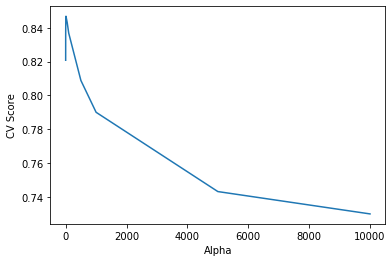

In [40]:
# Create some plots showing cv score over different alpha values

plt.plot(alpha_space[1:], ridge_cv.cv_results_['mean_test_score'][1:])
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.show()

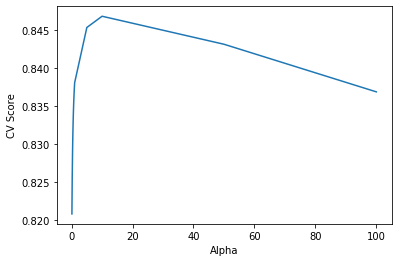

In [41]:
plt.plot(alpha_space[1:-4], ridge_cv.cv_results_['mean_test_score'][1:-4])
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.show()

# Alpha optimization

The alpha that produces the best score is alpha=10 so that will be used in future Ridge iterations

In [42]:
# Applying Ridge Regression with different alpha based on grid search CV results

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=10, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)


In [43]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.6517879314718458
Root Mean Squared Error: 46765.919130024624
Mean Absolute Percent Error: 17.718179610349083


In [44]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Ridge_Train_a=10'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [45]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.6595012903843489
Root Mean Squared Error: 46216.0229219638
Mean Absolute Percent Error: 18.51675793095249


In [46]:
# Finding worst residuals for 95% 
residuals = y_test - ridge_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [47]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 75831.47574704856
p + 90024.51869082573


In [48]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Ridge_Test_a=10'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [49]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.179160,N/A,N/A
Linear_Test,0.877025,27774.277801,11.107240,54799.1,55049.2
Ridge_Train,0.924783,21735.300299,8.211178,N/A,N/A
Ridge_Test,0.894620,25710.742519,9.869781,40291,47665.9
Lasso_Train,0.930663,20868.514771,49.564078,N/A,N/A
Lasso_Test,0.887081,26614.446974,50.809840,219702,219698
Ridge_Train_a=10,0.651788,46765.919130,17.718180,N/A,N/A
Ridge_Test_a=10,0.659501,46216.022922,18.516758,90024.5,75831.5


In [50]:
# Applying Ridge Regression with different alpha based on earlier testing 

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)


In [51]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8803963770194232
Root Mean Squared Error: 27408.150631030552
Mean Absolute Percent Error: 9.480727315879573


In [52]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Ridge_Train_a=1'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [53]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8729249000973185
Root Mean Squared Error: 28233.5224482231
Mean Absolute Percent Error: 9.947499373223314


In [54]:
# Finding worst residuals for 95% 
residuals = y_test - ridge_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [55]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 55109.22078857827
p + 52153.81173303968


In [56]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Ridge_Test_a=1'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [57]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.179160,N/A,N/A
Linear_Test,0.877025,27774.277801,11.107240,54799.1,55049.2
Ridge_Train,0.924783,21735.300299,8.211178,N/A,N/A
Ridge_Test,0.894620,25710.742519,9.869781,40291,47665.9
Lasso_Train,0.930663,20868.514771,49.564078,N/A,N/A
Lasso_Test,0.887081,26614.446974,50.809840,219702,219698
Ridge_Train_a=10,0.651788,46765.919130,17.718180,N/A,N/A
Ridge_Test_a=10,0.659501,46216.022922,18.516758,90024.5,75831.5
Ridge_Train_a=1,0.880396,27408.150631,9.480727,N/A,N/A


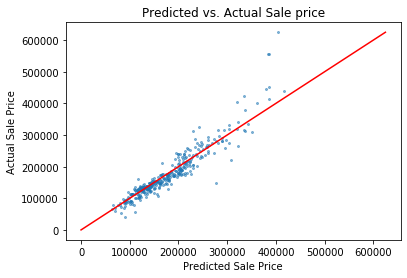

In [58]:
# Predicted vs actual scatterplot
plt.scatter(ridge_pred_test, y_test, alpha=0.5, s=4)
plt.title('Predicted vs. Actual Sale price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.plot(list(range(y_test.max())),list(range(y_test.max())), c='r')
plt.show()

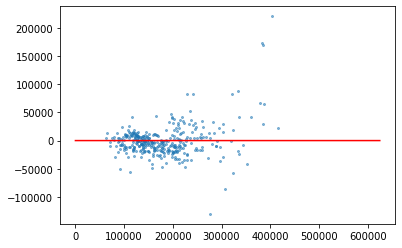

In [59]:
# Predicted vs residuals
residuals = y_test - ridge_pred_test
plt.scatter(ridge_pred_test, residuals, alpha = 0.5, s=4)
plt.plot(list(range(y_test.max())),[0]*y_test.max(), c='r')
plt.show()

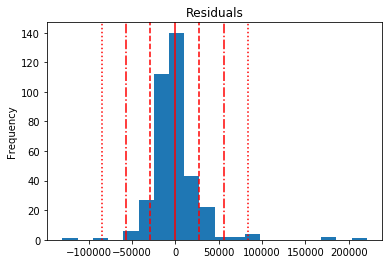

In [60]:
# Histogram of Residuals
mean = np.mean(residuals)
std_dev = np.std(residuals)

plt.hist(residuals, bins=20)
plt.axvline(mean, color='r')
plt.axvline(mean + std_dev, color='r', linestyle='--')
plt.axvline(mean + 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean + 3* std_dev, color='r', linestyle=':')
plt.axvline(mean - std_dev, color='r', linestyle='--')
plt.axvline(mean - 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean - 3* std_dev, color='r', linestyle=':')
plt.title('Residuals')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Using model on entire data set for residual analysis
ridge_pred_all = ridge.predict(X)
residu_all = y - ridge_pred_all



In [62]:
#Expected number of residuals outside 3 standard devations
len(housing)*0.0027

3.9204000000000003

In [63]:
# A set of all indicies of high outlier points
high_residuals = np.where(abs(residu_all) > mean + 3* std_dev)

In [64]:
residu_all[high_residuals]

array([ 114393.27786226,  101050.44205769,  -84152.11077988,
        -85685.5089314 ,  169388.21426656,  107952.11319829,
         98423.0598766 , -191412.8486699 ,  -88053.52323121,
        -90502.80934827,   88220.09686655,  128246.63465146,
        236407.09054095,  108475.09178958,  103218.00184068,
        175950.61122712,  203401.26602261,  172773.21224808,
         93309.44691594,  220959.84975065,  234487.12868929,
       -159737.89476086, -130341.62409469])

In [65]:
high_residuals[0].shape

(23,)

In [66]:
# Investigating outliers
housing.loc[list(high_residuals[0])].drop(['LotFrontage', 'Alley', 'Street', 'SaleType', '3SsnPorch', 'MiscVal',
                                          'MSSubClass','MSZoning','LandContour','PoolQC', 'LandSlope',
                                          'Fence', 'SaleCondition', 'BathroomCount', 'ScreenPorch', 'PavedDrive',
                                          'Condition1', 'Condition2','LotArea', 'Utilities', 'RoofStyle',
                                          'RoofMatl', 'GarageQual', 'GarageCond', 'GarageCars', 'PoolArea', 'MoSold',
                                          'Functional', 'LotShape', 'YearBuilt', 'Exterior1st', 'Exterior2nd',
                                          'MasVnrType', 'MasVnrArea','Fireplaces','FireplaceQu', 'Foundation',
                                          'LotConfig', 'KitchenAbvGr','BedroomAbvGr'], axis=1)

,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GrLivArea,KitchenQual,TotRmsAbvGrd,GarageType,GarageFinish,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
178,Sawyer,1Fam,1.5Fin,5,5,1958,Gd,Gd,TA,TA,...,1920,Gd,8,Attchd,Unf,0,0,0,2006,172500
185,BrkSide,1Fam,1.5Fin,5,8,1991,TA,TA,Fa,TA,...,1252,TA,5,Attchd,Unf,104,0,0,2006,127000
197,Somerst,1Fam,1Story,7,5,2007,Ex,TA,Ex,TA,...,1726,Ex,8,Attchd,Fin,171,138,0,2007,311872
411,Edwards,1Fam,1Story,5,3,1958,TA,Fa,TA,Fa,...,1276,TA,5,Attchd,Unf,0,0,0,2009,60000
439,Crawfor,1Fam,1Story,5,6,2002,TA,TA,TA,TA,...,694,Gd,4,Detchd,Unf,0,0,34,2007,90350
472,NWAmes,1Fam,2Story,7,6,1977,TA,TA,Gd,TA,...,1969,TA,8,Attchd,RFn,0,0,0,2007,190000
495,OldTown,1Fam,1Story,5,8,1996,TA,TA,Fa,TA,...,886,TA,4,Attchd,Unf,144,20,80,2009,91300
522,NAmes,1Fam,1Story,6,6,1957,TA,TA,TA,TA,...,1244,TA,6,Attchd,Unf,0,40,0,2007,150000
579,Somerst,TwnhsE,2Story,7,5,2007,Gd,TA,Gd,TA,...,1392,Gd,5,Detchd,Unf,0,102,0,2008,146000


In [67]:
# Dropping Outliers
X_no_outliers = np.delete(X, high_residuals[0], axis=0)
y_no_outliers = np.delete(y, high_residuals[0], axis=0)

In [68]:
# Applying Ridge Regression with outliers removed

# Train test split -- Random state 42 should produce same split as above
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size = 0.25, random_state=42)

# Creating Ridge object, fitting, and predicting. Normalize = true ensures all variables are on the same scale
ridge = Ridge(alpha=1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)


In [69]:
# Metrics for train set
print("R^2: {}".format(ridge.score(X_train, y_train)))
rmse = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_train-ridge_pred_train)/y_train * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))




R^2: 0.9157055379295823
Root Mean Squared Error: 20519.863551582283
Mean Absolute Percent Error: 8.626238797290668


In [70]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_train, y_train)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':['N/A'], 'Worst Overestimate':['N/A']}
temp = pd.DataFrame(data=d, index=['Ridge_Train_No_Outliers'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [71]:
# Performance Metrics for test set
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
error = (y_test-ridge_pred_test)/y_test * 100
mape = abs(error).mean()
print('Mean Absolute Percent Error: {}'.format(mape))

R^2: 0.8942332343634054
Root Mean Squared Error: 21722.649042670208
Mean Absolute Percent Error: 9.794926929060916


In [72]:
# Finding worst residuals for 95% 
residuals = y_test - ridge_pred_test
residuals_trimmed = residuals[abs(residuals) < np.mean(residuals)+2*np.std(residuals)]
r_pos = max(residuals_trimmed)
r_neg = abs(min(residuals_trimmed))

Given a prediction "p" computed by my model, the worst case scenarios according to the tests I performed, are

In [73]:
print('p - {}'.format(r_neg))
print('p + {}'.format(r_pos))

p - 42354.862323655165
p + 42486.28456097946


In [74]:
# Adding metrics to the metrics dataframe
d = {'R_Squared': [ridge.score(X_test, y_test)], 'RMSE': [rmse], 'MAPE (%)': [mape],
    'Worst Underestimate':[r_pos], 'Worst Overestimate':[r_neg]}
temp = pd.DataFrame(data=d, index=['Ridge_Test_No_Outliers'])
temp.index.name = 'Model'
metrics = metrics.append(temp)

In [75]:
metrics

,R_Squared,RMSE,MAPE (%),Worst Underestimate,Worst Overestimate
Model,,,,,
Linear_Train,0.930668,20867.619109,8.179160,N/A,N/A
Linear_Test,0.877025,27774.277801,11.107240,54799.1,55049.2
Ridge_Train,0.924783,21735.300299,8.211178,N/A,N/A
Ridge_Test,0.894620,25710.742519,9.869781,40291,47665.9
Lasso_Train,0.930663,20868.514771,49.564078,N/A,N/A
Lasso_Test,0.887081,26614.446974,50.809840,219702,219698
Ridge_Train_a=10,0.651788,46765.919130,17.718180,N/A,N/A
Ridge_Test_a=10,0.659501,46216.022922,18.516758,90024.5,75831.5
Ridge_Train_a=1,0.880396,27408.150631,9.480727,N/A,N/A


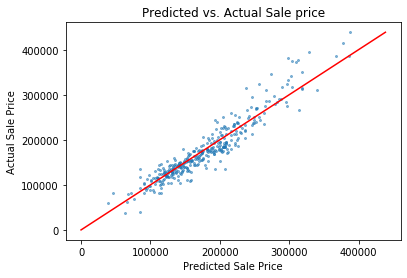

In [76]:
# Rerunning graphics with No_outliers model

# Predicted vs actual scatterplot
plt.scatter(ridge_pred_test, y_test, alpha=0.5, s=4)
plt.title('Predicted vs. Actual Sale price')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.plot(list(range(y_test.max())),list(range(y_test.max())), c='r')
plt.show()

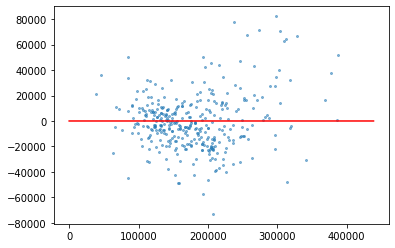

In [77]:
# Predicted vs residuals
residuals = y_test - ridge_pred_test
plt.scatter(ridge_pred_test, residuals, alpha = 0.5, s=4)
plt.plot(list(range(y_test.max())),[0]*y_test.max(), c='r')
plt.show()

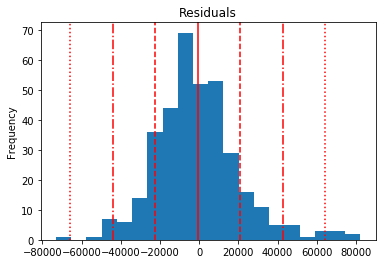

In [78]:

# Histogram of Residuals

mean = np.mean(residuals)
std_dev = np.std(residuals)

plt.hist(residuals, bins=20)
plt.axvline(mean, color='r')
plt.axvline(mean + std_dev, color='r', linestyle='--')
plt.axvline(mean + 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean + 3* std_dev, color='r', linestyle=':')
plt.axvline(mean - std_dev, color='r', linestyle='--')
plt.axvline(mean - 2* std_dev, color='r', linestyle='-.')
plt.axvline(mean - 3* std_dev, color='r', linestyle=':')
plt.title('Residuals')
plt.ylabel('Frequency')
plt.show()